Classificação de registros MNIST

**Importações iniciais**

In [0]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

**Leitura da base de dados MNIST**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Usando a função ***Shape()*** para verificar a forma dos conjuntos de dados**

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

**Visualização dos dados**

*  X_train na posição 2, como exemplo de amostra



Text(0.5, 1.0, 'Classe4')

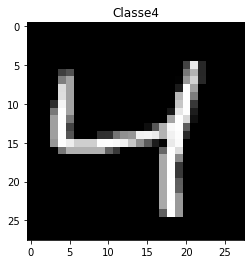

In [126]:
plt.imshow(X_train[2], cmap='gray')
plt.title('Classe' + str(y_train[2]))

**Conversão dos dados para o TensorFlow realizar a leitura**

*   Função ***reshape***, para remodelar a forma dos dados



In [0]:
features_train = X_train.reshape(X_train.shape[0],
                                 28, 28, 1)

In [0]:
features_test = X_test.reshape(X_test.shape[0],
                               28, 28, 1)

In [0]:
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

**Modificar a escala dos dados**

*   escala de 0 a 1


In [0]:
features_train /= 255

In [0]:
features_test /= 255

**Variáveis do tipo dummy**

In [0]:
class_train = np_utils.to_categorical(y_train, 10)

In [133]:
class_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
class_test = np_utils.to_categorical(y_test, 10)

**Estrutura da CNN**

In [135]:
classificador = Sequential()
classificador.add(Conv2D(32, (3,3), 
                         input_shape=(28, 28, 1),
                         activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
#classificador.add(Flatten())


classificador.add(Conv2D(32, (3,3), 
                         input_shape=(28, 28, 1),
                         activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size = (2,2)))
classificador.add(Flatten())

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 10, 
                        activation = 'softmax'))
classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])
classificador.fit(features_train, class_train,
                  batch_size = 128, epochs = 5,
                  validation_data = (features_test, class_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2156 - accuracy: 0.9336 - val_loss: 0.1637 - val_accuracy: 0.9508
Epoch 2/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0644 - accuracy: 0.9806 - val_loss: 0.0440 - val_accuracy: 0.9859
Epoch 3/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 4/5
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0364 - accuracy: 0.9889 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 5/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0370 - val_accuracy: 0.9886


In [136]:
resultado = classificador.evaluate(features_test, class_test)

10000/10000 [==============================] - 4s 356us/step


In [137]:
resultado

[0.036990354601324, 0.9886000156402588]